<img src="https://upload.wikimedia.org/wikipedia/commons/3/30/ZOHO_logo_2023.svg" alt="ZOHO Logo">

## Zoho Corporation Apps Recommendation System Machine Learning Project
***Project By : PRASAD JADHAV***

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset
file_path = 'zoho_app_usage_dataset_v2.csv'

In [5]:
df = pd.read_csv(file_path)
pd.set_option('display.max_columns',40)
print(df.shape)

(10000, 40)


In [6]:
df.head()

,user_id,app_name,downloads,rating,feedback,screen_time,sessions_per_day,app_version,device_type,os_version,network_type,age_group,gender,feedback_sentiment,subscription_type,ad_clicks,purchase_count,error_reports,churn_flag,referral_code_used,engagement_score,app_launch_time,data_usage,clickstream_events,retention_days,social_shares,feature_usage_rate,inactive_days,avg_session_duration,time_of_day_usage,last_active_date,device_battery_usage,permission_granted,user_region,connected_apps,app_habit_score,error_type,session_start_time,device_RAM_usage,in_app_notifications_clicked
0,U00001,Zoho CRM,726453,4.6,Region next kid ability fall place white hit i...,93,9,1.7.8,iOS,iOS 17,Mobile Data,18-25,Other,0,Premium,19,5,1,1,0,34,3.83,57.72,28,48,2,57.8,16,59.13,Afternoon,2023-07-26,49.1,0,Europe,9,59,Sync Issue,06:40:52,1504.13,7
1,U00002,Zoho Meeting,984708,4.6,Learn section age land improve leader federal.,90,3,2.5.2,Android,Android 13,Wi-Fi,36-45,Male,0,Free,13,3,0,0,0,96,3.44,432.16,27,103,18,44.4,26,56.85,Night,2024-01-29,46.4,0,South America,0,99,Crash,21:46:12,2164.25,5
2,U00003,Zoho Sheet,923854,4.9,Vote doctor themselves stuff other possible.,243,2,4.7.7,Android,Android 12,Mobile Data,18-25,Male,1,Premium,4,9,3,1,1,85,1.60,10.35,14,329,0,93.6,26,53.07,Afternoon,2024-03-25,28.1,0,Europe,3,84,NaN,19:39:15,4581.96,1
3,U00004,Zoho Show,20137,4.6,Look theory program peace section admit manage...,204,8,4.1.7,Android,iOS 17,Mobile Data,46-55,Male,0,Free,0,6,3,0,1,50,3.72,83.27,137,132,26,86.4,3,46.23,Night,2023-10-23,1.2,0,South America,6,82,Sync Issue,14:55:19,6449.62,6
4,U00005,Zoho Invoice,137441,4.7,Those might girl heart open reflect name analy...,109,7,2.6.1,Android,iOS 16,Wi-Fi,26-35,Other,0,Premium,16,3,1,0,0,32,4.16,15.86,34,1,14,68.6,24,6.23,Evening,2024-02-03,49.3,0,Europe,7,63,Crash,02:15:52,225.71,5


In [38]:
df.tail()

,user_id,app_name,downloads,rating,feedback,screen_time,sessions_per_day,app_version,device_type,os_version,network_type,age_group,gender,feedback_sentiment,subscription_type,ad_clicks,purchase_count,error_reports,churn_flag,referral_code_used,...,data_usage,clickstream_events,retention_days,social_shares,feature_usage_rate,inactive_days,avg_session_duration,time_of_day_usage,last_active_date,device_battery_usage,permission_granted,user_region,connected_apps,app_habit_score,error_type,session_start_time,device_RAM_usage,in_app_notifications_clicked,user_id_encoded,app_name_encoded
9995,U09996,Zoho Expense,307221,4.2,Agree without either general occur far resource.,284,8,1.6.4,Android,iOS 16,Mobile Data,18-25,Other,0,Free,1,5,0,1,1,...,30.98,150,15,18,53.0,19,46.19,Morning,2023-03-31,21.1,1,South America,5,68,Login Issue,01:40:55,6567.01,4,9995,7
9996,U09997,Zoho Social,410819,4.7,Mouth plant be rate should debate without rais...,181,8,1.2.1,Android,iOS 17,Mobile Data,18-25,Other,1,Premium,17,8,1,1,0,...,442.95,88,310,1,73.3,4,29.14,Evening,2022-12-25,16.8,1,South America,4,64,NaN,18:52:14,2440.27,6,9996,16
9997,U09998,Zoho CRM,991833,4.8,Chair live issue him through tend road next.,38,4,3.7.3,Android,iOS 17,Mobile Data,36-45,Female,-1,Premium,5,1,0,1,0,...,353.94,18,89,44,48.4,20,51.91,Morning,2024-09-06,17.4,1,South America,8,54,Crash,05:50:35,2130.19,6,9997,2
9998,U09999,Zoho Sprints,502837,4.2,Thing at fire always sell case have.,107,9,1.5.4,iOS,Android 13,Mobile Data,26-35,Male,0,Free,11,0,3,1,1,...,409.60,177,136,9,75.1,19,12.64,Night,2023-03-21,26.3,0,Asia,1,74,Crash,22:38:07,2649.31,5,9998,17
9999,U10000,Zoho WorkDrive,229152,4.1,Operation read yourself analysis according all...,128,1,5.6.0,Android,iOS 17,Mobile Data,46-55,Male,1,Free,18,2,3,1,0,...,439.52,187,221,12,94.6,3,43.46,Afternoon,2023-04-18,16.1,0,Europe,6,50,NaN,13:21:37,2498.24,2,9999,18


### Dataset Structure Overview Columns:

- user_id: Unique identifier for the user (e.g., U001, U002).
- app_name: Name of the app (e.g., "Zoho Mail", "Zoho CRM").
- downloads: Number of app downloads (e.g., 100000).
- rating: User's rating for the app (e.g., 4.5).
- feedback: User feedback text (e.g., "Excellent features, but UI needs improvement").
- screen_time: Total screen time spent on the app per day (in minutes).
- sessions_per_day: Number of sessions the user opens the app in a day.
- app_version: Current version of the app installed (e.g., 1.2.3).
- device_type: Type of device used (e.g., "Android", "iOS").
- os_version: Operating system version (e.g., "Android 13", "iOS 17").
- network_type: Network used (e.g., "Wi-Fi", "Mobile Data").
- age_group: Age group of the user (e.g., "18-25", "26-35").
- gender: Gender of the user (e.g., "Male", "Female", "Other").
- feedback_sentiment: Sentiment score of feedback (calculated as -1, 0, or 1 for negative, neutral, or positive feedback).
- subscription_type: Free or premium subscription.
- ad_clicks: Number of ad clicks in the app.
- purchase_count: Number of in-app purchases made by the user.
- error_reports: Number of app crashes or error reports from the user.
- churn_flag: Whether the user uninstalled the app or stopped using it (0 or 1).
- referral_code_used: Whether the user used a referral code (1 or 0).
- engagement_score: Combined score of engagement based on screen time, sessions, and interactions (0-100 scale).
- app_launch_time: Average time taken to launch the app (in seconds).
- data_usage: Total data used by the app per day (in MB).
- clickstream_events: Total number of in-app clicks/taps.
- retention_days: Number of days the user remained active after installation.
- social_shares: Number of times the user shared content from the app on social media.
- feature_usage_rate: Percentage of app features used by the user (e.g., 70%).
- inactive_days: Number of days the user did not open the app.
- avg_session_duration: Average duration of each session (in minutes).
- time_of_day_usage: Most active usage time (e.g., "Morning", "Afternoon", "Evening").
- last_active_date: Date when the user last used the app.
- device_battery_usage: Percentage of battery consumed by the app per day.
- permission_granted: Boolean flag indicating if critical permissions (location, camera, etc.) were granted (1 or 0).
- user_region: Geographic region of the user (e.g., "North America", "Europe").
- connected_apps: Number of other apps connected with this app (e.g., via API or integration).
- app_habit_score: Machine learning-derived score summarizing the user's app usage habits (e.g., 85).
- error_type: Categorical variable specifying the type of errors encountered (e.g., "Login Issue", "Crash").
- session_start_time: Time of the day when the user starts using the app.
- device_RAM_usage: RAM consumption by the app (in MB).
- in_app_notifications_clicked: Number of in-app notifications clicked by the user.

### Data Exploration

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       10000 non-null  object 
 1   app_name                      10000 non-null  object 
 2   downloads                     10000 non-null  int64  
 3   rating                        10000 non-null  float64
 4   feedback                      10000 non-null  object 
 5   screen_time                   10000 non-null  int64  
 6   sessions_per_day              10000 non-null  int64  
 7   app_version                   10000 non-null  object 
 8   device_type                   10000 non-null  object 
 9   os_version                    10000 non-null  object 
 10  network_type                  10000 non-null  object 
 11  age_group                     10000 non-null  object 
 12  gender                        10000 non-null  object 
 13  fe

In [40]:
df.isnull().sum()

,0
user_id,0
app_name,0
downloads,0
rating,0
feedback,0
screen_time,0
sessions_per_day,0
app_version,0
device_type,0
os_version,0


In [41]:
df.duplicated().sum()

0

In [42]:
df.describe()

,downloads,rating,screen_time,sessions_per_day,feedback_sentiment,ad_clicks,purchase_count,error_reports,churn_flag,referral_code_used,engagement_score,app_launch_time,data_usage,clickstream_events,retention_days,social_shares,feature_usage_rate,inactive_days,avg_session_duration,device_battery_usage,permission_granted,connected_apps,app_habit_score,device_RAM_usage,in_app_notifications_clicked,user_id_encoded,app_name_encoded
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,502027.412600,4.202480,151.339300,4.984000,-0.010500,9.425100,4.506300,1.985900,0.49780,0.510400,49.75840,3.029043,255.606426,104.383300,182.191500,24.470500,64.567090,14.300800,30.780141,25.44080,0.492900,4.514000,74.538400,4087.533568,4.496100,4999.50000,9.440200
std,287682.809638,0.431027,85.035764,2.602042,0.812807,5.781447,2.863351,1.412834,0.50002,0.499917,29.19707,1.151558,141.779699,55.179857,104.790136,14.513786,20.271938,8.641515,17.055561,14.22075,0.499975,2.871276,14.400836,2276.862782,2.867404,2886.89568,5.771946
min,1027.000000,3.500000,5.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,1.000000,10.020000,10.000000,1.000000,0.000000,30.000000,0.000000,1.000000,1.00000,0.000000,0.000000,50.000000,100.450000,0.000000,0.00000,0.000000
25%,252660.750000,3.800000,78.000000,3.000000,-1.000000,4.000000,2.000000,1.000000,0.00000,0.000000,24.00000,2.040000,132.032500,57.000000,92.000000,12.000000,46.700000,7.000000,16.090000,13.10000,0.000000,2.000000,62.000000,2148.060000,2.000000,2499.75000,4.000000
50%,502108.000000,4.200000,151.000000,5.000000,0.000000,9.000000,5.000000,2.000000,0.00000,1.000000,49.00000,3.050000,257.555000,104.000000,182.000000,24.000000,64.600000,14.000000,30.810000,25.20000,0.000000,5.000000,75.000000,4114.985000,4.000000,4999.50000,9.000000
75%,755200.250000,4.600000,225.000000,7.000000,1.000000,14.000000,7.000000,3.000000,1.00000,1.000000,75.00000,4.030000,379.102500,152.000000,271.000000,37.000000,82.400000,22.000000,45.442500,37.70000,1.000000,7.000000,87.000000,6095.062500,7.000000,7499.25000,14.000000
max,999944.000000,4.900000,299.000000,9.000000,1.000000,19.000000,9.000000,4.000000,1.00000,1.000000,100.00000,5.000000,499.940000,199.000000,364.000000,49.000000,100.000000,29.000000,60.000000,50.00000,1.000000,9.000000,99.000000,7999.020000,9.000000,9999.00000,19.000000


In [43]:
cat_cols = [x for x in df.columns if df[x].dtypes != 'float64']

for col in cat_cols:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n" + "_"*40 + "\n")

Value counts for column 'user_id':
user_id
U00001    1
U06671    1
U06664    1
U06665    1
U06666    1
         ..
U03334    1
U03335    1
U03336    1
U03337    1
U10000    1
Name: count, Length: 10000, dtype: int64

________________________________________

Value counts for column 'app_name':
app_name
Zoho Meeting      527
Zoho Projects     523
Zoho Writer       523
Zoho Books        521
Zoho Desk         517
Zoho CRM          517
Zoho Creator      516
Zoho People       511
Zoho Cliq         509
Zoho Expense      508
Zoho Analytics    499
Zoho Invoice      492
Zoho WorkDrive    490
Zoho Social       490
Zoho Sprints      488
Zoho Mail         481
Zoho Show         474
Zoho Sheet        473
Zoho Campaigns    471
Zoho Sign         470
Name: count, dtype: int64

________________________________________

Value counts for column 'downloads':
downloads
231825    2
185791    2
457975    2
327780    2
514784    2
         ..
933918    1
336071    1
418527    1
559965    1
229152    1
Name: co

In [44]:
num_cols = [x for x in df.columns if df[x].dtypes == 'float64']

for col in num_cols:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n" + "_"*40 + "\n")

Value counts for column 'rating':
rating
3.9    721
4.2    701
4.8    690
4.1    677
4.4    672
4.6    668
4.5    668
4.7    663
3.7    661
3.5    661
4.9    660
4.0    647
3.8    641
3.6    641
4.3    629
Name: count, dtype: int64

________________________________________

Value counts for column 'app_launch_time':
app_launch_time
1.44    40
2.79    39
3.74    39
3.94    36
3.85    36
        ..
2.97    14
5.00    13
1.77    12
3.02    12
1.00     6
Name: count, Length: 401, dtype: int64

________________________________________

Value counts for column 'data_usage':
data_usage
479.10    5
295.20    4
306.92    4
106.47    4
135.22    4
         ..
479.25    1
479.40    1
251.31    1
319.95    1
439.52    1
Name: count, Length: 9027, dtype: int64

________________________________________

Value counts for column 'feature_usage_rate':
feature_usage_rate
83.1     28
97.2     26
30.6     26
44.7     25
34.4     24
         ..
100.0     5
81.5      5
47.1      5
93.7      5
95.3      4
Na

In [45]:
num_features = df.select_dtypes(include = ['int64', 'float64']).dtypes.index

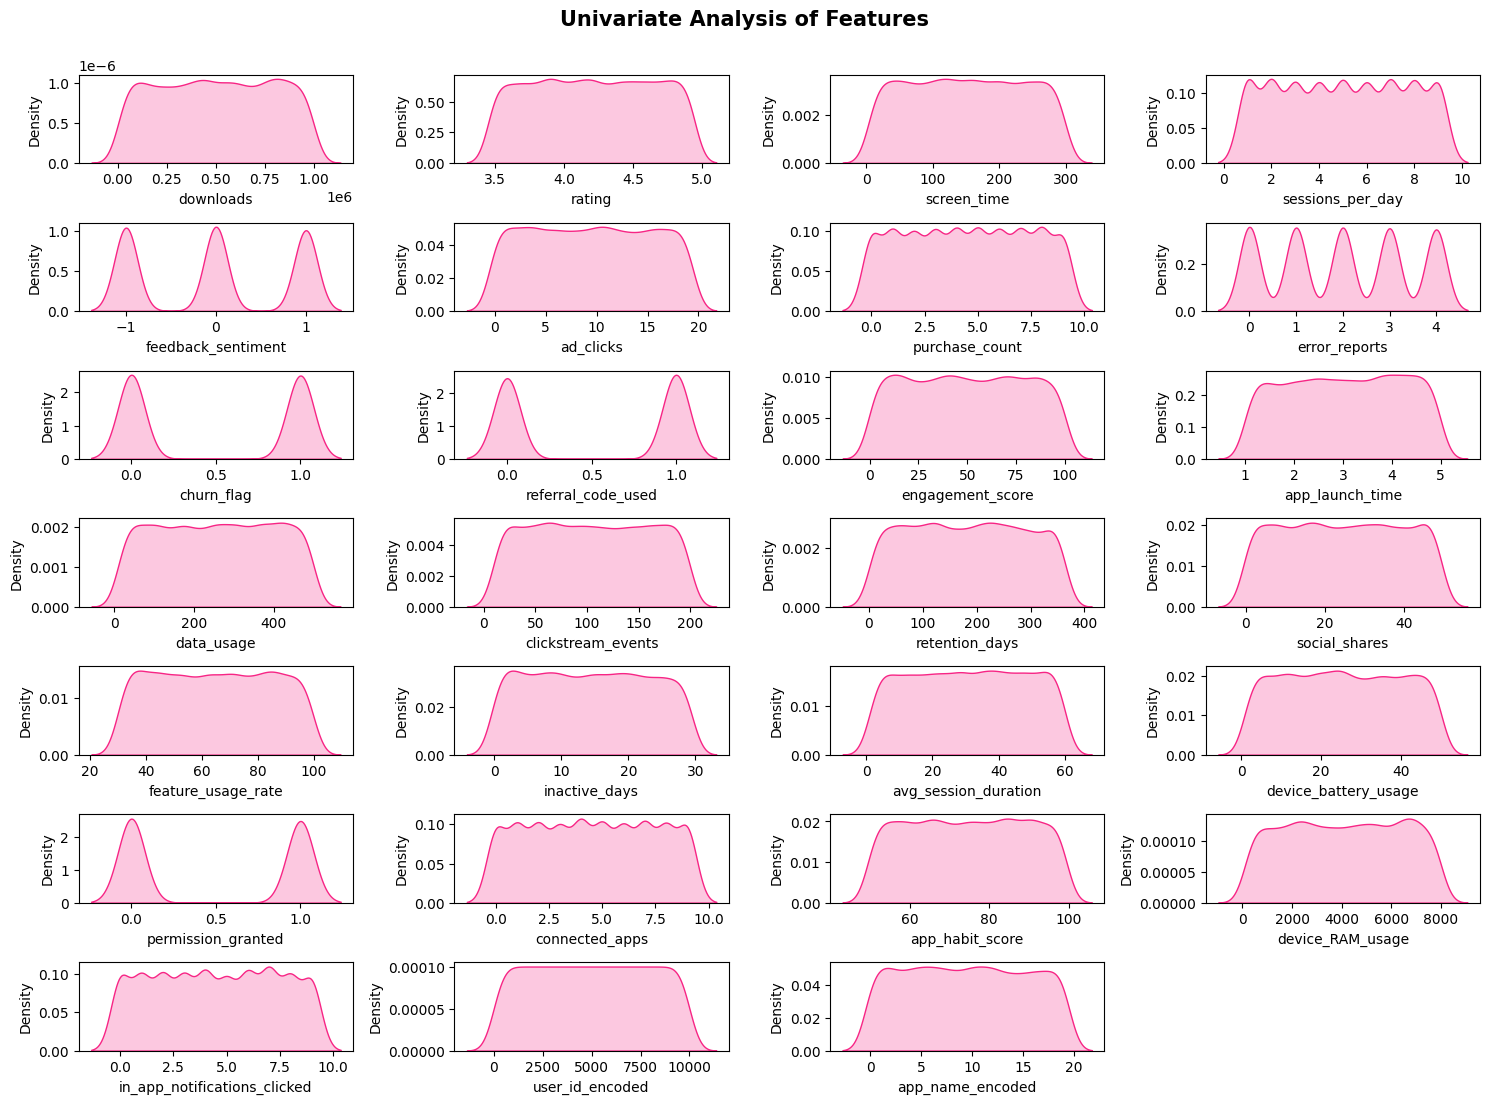

In [46]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(num_features)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=df[num_features[i]],shade=True,color='#F72585') #7209B7
    plt.tight_layout()

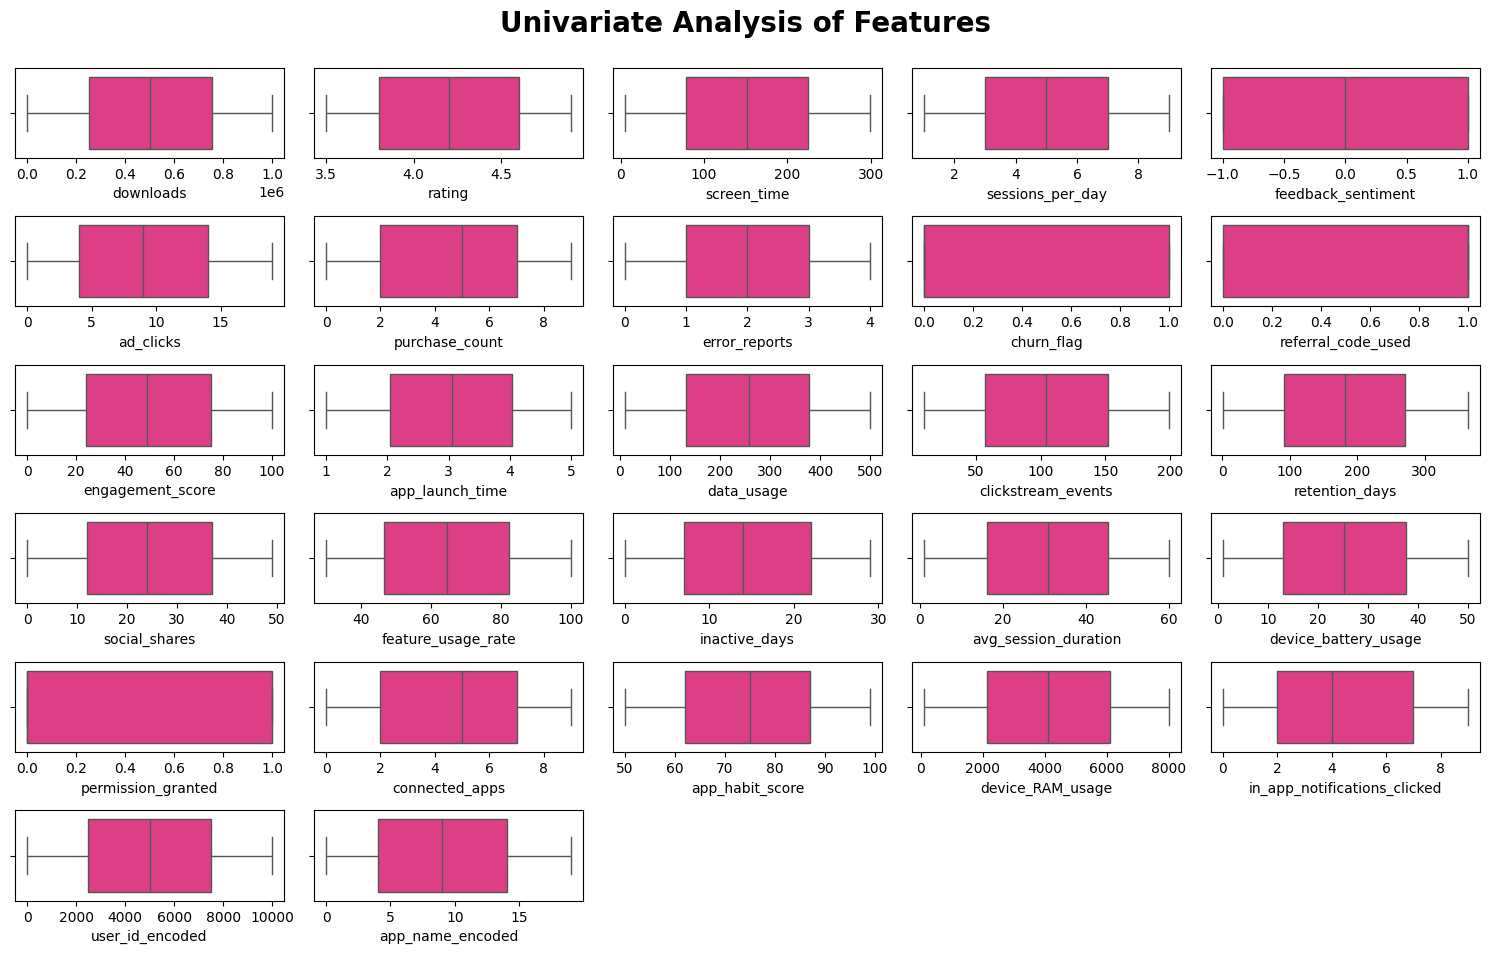

In [47]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=20,y=1)

for i in range(0,len(num_features)):
    plt.subplot(10,5,i+1)
    sns.boxplot(data=df,x=num_features[i],color='#F72585')
    plt.xlabel(num_features[i])
    plt.tight_layout()

In [ ]:
cat_features = df.select_dtypes(include='object').dtypes.index

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(cat_features)):
    plt.subplot(10,4,i+1)
    sns.countplot(x=df[cat_features[i]],color='#F72585')
    plt.tight_layout()

### Approach:

#### Problem Definition:

- Build a Recommendation System that predicts app ratings for users and recommends top-rated apps.

#### Techniques:

- Collaborative Filtering: User-Item Matrix.
- Matrix Factorization: Singular Value Decomposition (SVD).
- Use Surprise library for implementing the collaborative filtering models.

#### Steps:

- Load the data.
- Preprocess it for recommendation.
- Use SVD for predictions.
- Generate app recommendations for specific users.

In [10]:
# Import Libraries
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV

# Step 1: Data Preprocessing
# Extract necessary columns: 'user_id', 'app_name', 'rating'
df_recommend = df[['user_id', 'app_name', 'rating']]

# Check for missing ratings
print("\nMissing Ratings:", df_recommend['rating'].isnull().sum())

# Step 2: Prepare Dataset for Surprise Library
# Define Reader - set rating scale
reader = Reader(rating_scale=(df_recommend['rating'].min(), df_recommend['rating'].max()))

# Load the Dataset for Surprise
data = Dataset.load_from_df(df_recommend[['user_id', 'app_name', 'rating']], reader)

# Split Data into Train and Test Sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Step 3: Build the Recommendation Model (SVD)
# Use SVD (Matrix Factorization)
model = SVD()

# Train the model
model.fit(trainset)

# Make Predictions on the Test Set
predictions = model.test(testset)

# Evaluate Model Performance
print("\n--- Model Evaluation ---")
accuracy.rmse(predictions)

# Step 4: Make Recommendations
def get_top_n_recommendations(predictions, n=5):
    """Return the top N recommendations for each user."""
    from collections import defaultdict

    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Sort predictions by estimated rating
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Get Top Recommendations
top_n_recommendations = get_top_n_recommendations(predictions, n=5)

# Display Recommendations for a Few Users
print("\n--- Top 5 App Recommendations for Each User ---")
for user, recs in list(top_n_recommendations.items())[:5]:  # Display for first 5 users
    print(f"User {user}:")
    for app, rating in recs:
        print(f"   App: {app}, Predicted Rating: {rating:.2f}")

# Step 5: GridSearch for Hyperparameter Tuning
param_grid = {
    'n_factors': [50, 100],
    'reg_all': [0.02, 0.1],
    'lr_all': [0.005, 0.01]
}

print("\n--- Hyperparameter Tuning Using GridSearch ---")
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# Best Score and Parameters
print("Best RMSE Score:", gs.best_score['rmse'])
print("Best Parameters:", gs.best_params['rmse'])


Missing Ratings: 0

--- Model Evaluation ---
RMSE: 0.4378

--- Top 5 App Recommendations for Each User ---
User U00400:
   App: Zoho Social, Predicted Rating: 4.21
User U07248:
   App: Zoho People, Predicted Rating: 4.24
User U06407:
   App: Zoho CRM, Predicted Rating: 4.23
User U00883:
   App: Zoho Creator, Predicted Rating: 4.19
User U03566:
   App: Zoho Cliq, Predicted Rating: 4.20

--- Hyperparameter Tuning Using GridSearch ---
Best RMSE Score: 0.4320626540878178
Best Parameters: {'n_factors': 100, 'reg_all': 0.1, 'lr_all': 0.005}


### Approach Overview:

#### Collaborative Filtering:
- Leverages user ratings for apps to identify user-app relationships using matrix factorization techniques.
#### Content-Based Filtering:
- Utilizes app features (e.g., category, ratings, usage duration) to recommend similar apps.
#### Hybrid Recommendation System:
- Combines collaborative and content-based methods to deliver accurate recommendations.

In [24]:
# Import Libraries
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

# Step 1: Collaborative Filtering with SVD
# Prepare Data for Collaborative Filtering
cf_data = df[['user_id', 'app_name', 'rating']]

# Define Reader and Load Data
reader = Reader(rating_scale=(cf_data['rating'].min(), cf_data['rating'].max()))
data = Dataset.load_from_df(cf_data[['user_id', 'app_name', 'rating']], reader)

# Train-Test Split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build SVD Model
print("\n--- Collaborative Filtering with SVD ---")
svd_model = SVD()
svd_model.fit(trainset)

# Evaluate SVD Model
predictions = svd_model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"SVD RMSE: {rmse:.4f}")

# Generate Top-N Collaborative Recommendations
def get_top_n_collab_recommendations(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, _, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Display Top-5 Recommendations for Users
collab_recommendations = get_top_n_collab_recommendations(predictions, n=5)
print("\n--- Collaborative Filtering Recommendations ---")
for user, recs in list(collab_recommendations.items())[:3]:
    print(f"User {user}: {recs}")

# Step 2: Content-Based Filtering
# Content-Based Filtering
print("\n--- Content-Based Filtering ---")
app_features = df[['app_name', 'app_habit_score', 'engagement_score', 'rating']].drop_duplicates()

# Combine Features into a Single Representation (more robust handling of missing values)
app_features['features'] = app_features['app_habit_score'].astype(str) + " " + app_features['engagement_score'].astype(str) + " " + app_features['rating'].astype(str)
print("Feature Sample:\n", app_features[['app_name', 'features']].head())

# Calculate Cosine Similarity (do this ONCE outside the function)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(app_features['features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to Get Content-Based Recommendations
def get_content_based_recommendations(app_name, cosine_sim=cosine_sim, top_n=5, app_features=app_features):
    try:
        indices = pd.Series(app_features.index, index=app_features['app_name']).drop_duplicates()
        if app_name not in indices:
            return f"App '{app_name}' not found in the dataset."
        idx = indices[app_name]

        if isinstance(idx, pd.Series):
            idx = idx.iloc[0]  # Take the first index if there are duplicates

        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:top_n + 1]  # Exclude the app itself
        app_indices = [i[0] for i in sim_scores]
        return app_features['app_name'].iloc[app_indices]
    except KeyError:
        return f"App '{app_name}' not found in the dataset."
    except IndexError: #Handles cases where there are no recommendations
        return f"No recommendations found for '{app_name}'."

# Example: Recommend Similar Apps to 'Zoho Mail'
print("\nContent-Based Recommendations for 'Zoho Mail':")
print(get_content_based_recommendations('Zoho Mail'))

# Step 3: Hybrid Recommendation System
print("\n--- Hybrid Recommendation System ---")
def hybrid_recommendations(user_id, app_name, top_n=5):
    # Collaborative Filtering Recommendations
    collab_apps = [app for app, _ in collab_recommendations.get(user_id, [])]

    # Content-Based Recommendations
    content_apps = list(get_content_based_recommendations(app_name, top_n=top_n))

    # Combine and Deduplicate Recommendations
    hybrid_apps = list(set(collab_apps + content_apps))
    return hybrid_apps[:top_n]

# Example: Hybrid Recommendations for User 1 and 'Zoho CRM'
print("Hybrid Recommendations for User 1 and 'Zoho CRM':")
print(hybrid_recommendations(user_id=1, app_name='Zoho CRM', top_n=5))


--- Collaborative Filtering with SVD ---
RMSE: 0.4379
SVD RMSE: 0.4379

--- Collaborative Filtering Recommendations ---
User U00400: [('Zoho Social', 4.205836823546292)]
User U07248: [('Zoho People', 4.2416094632467445)]
User U06407: [('Zoho CRM', 4.227353768044962)]

--- Content-Based Filtering ---
Feature Sample:
        app_name   features
0      Zoho CRM  59 34 4.6
1  Zoho Meeting  99 96 4.6
2    Zoho Sheet  84 85 4.9
3     Zoho Show  82 50 4.6
4  Zoho Invoice  63 32 4.7

Content-Based Recommendations for 'Zoho Mail':
7123    Zoho Campaigns
8645          Zoho CRM
9756      Zoho Sprints
102     Zoho Campaigns
1311      Zoho Meeting
Name: app_name, dtype: object

--- Hybrid Recommendation System ---
Hybrid Recommendations for User 1 and 'Zoho CRM':
['Zoho Show', 'Zoho Social', 'Zoho Books', 'Zoho Sprints']


### Advanced Hybrid Recommendation System with NCF and Content-Based Models:
#### Key Enhancements:
- Neural Collaborative Filtering (NCF): Deep learning-based collaborative filtering to capture user-item interactions.
- Content-Based Filtering with ANN: Using Artificial Neural Networks to learn embeddings for app features and recommend similar apps.
- Hybrid System: Combining NCF predictions with ANN-based content similarity for improved recommendations.

In [29]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dot, Concatenate

# Step 1: Neural Collaborative Filtering (NCF)
print("\n--- Neural Collaborative Filtering ---")
# Encode user_id and app_name
user_encoder = LabelEncoder()
app_encoder = LabelEncoder()

df['user_id_encoded'] = user_encoder.fit_transform(df['user_id'])
df['app_name_encoded'] = app_encoder.fit_transform(df['app_name'])

# Train-Test Split
train, test = train_test_split(df, test_size=0.2, random_state=42)

# NCF Model Architecture
num_users = df['user_id_encoded'].nunique()
num_apps = df['app_name_encoded'].nunique()

# User and App Input Layers
user_input = Input(shape=(1,), name="user_input")
app_input = Input(shape=(1,), name="app_input")

# Embedding Layers
user_embedding = Embedding(input_dim=num_users, output_dim=50)(user_input)
app_embedding = Embedding(input_dim=num_apps, output_dim=50)(app_input)

# Flatten Layers
user_flat = Flatten()(user_embedding)
app_flat = Flatten()(app_embedding)

# Combine User and App Features
dot_product = Dot(axes=1)([user_flat, app_flat])
concat = Concatenate()([user_flat, app_flat])
hidden = Dense(128, activation='relu')(concat)
hidden = Dense(64, activation='relu')(hidden)
output = Dense(1, activation='linear')(hidden)

# Build Model
ncf_model = Model(inputs=[user_input, app_input], outputs=output)
ncf_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
ncf_model.summary()

# Train Model
ncf_model.fit([train['user_id_encoded'], train['app_name_encoded']],
              train['rating'], epochs=5, batch_size=64, verbose=1)

# Evaluate Model
loss, mae = ncf_model.evaluate([test['user_id_encoded'], test['app_name_encoded']], test['rating'], verbose=1)
print(f"Neural CF MAE: {mae:.4f}")

# Step 2: Content-Based Filtering with ANN
print("\n--- Content-Based Filtering with ANN ---")
# Prepare App Features
app_features = df[['app_name', 'app_habit_score', 'screen_time']].drop_duplicates()

# Convert app_habit_score to string before concatenation
app_features['features'] = app_features['app_habit_score'].astype(str) + " " + app_features['screen_time'].astype(str)

# Convert Features to Vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(app_features['features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# ANN Model for Learning Content Embeddings
app_input_ann = Input(shape=(tfidf_matrix.shape[1],), name="app_features_input")
hidden_layer = Dense(128, activation='relu')(app_input_ann)
hidden_layer = Dense(64, activation='relu')(hidden_layer)
# Change the output dimension to match the input dimension
output_ann = Dense(tfidf_matrix.shape[1], activation='linear')(hidden_layer) # Changed this line

content_ann_model = Model(inputs=app_input_ann, outputs=output_ann)
content_ann_model.compile(optimizer='adam', loss='mse')

# Train ANN for Feature Learning
features_train = tfidf_matrix.toarray()
content_ann_model.fit(features_train, features_train, epochs=10, batch_size=32, verbose=1)

# Step 3: Hybrid Recommendation System
print("\n--- Hybrid Recommendation System ---")

# Get NCF Recommendations
def get_ncf_recommendations(user_id, top_n=5):
    user_idx = user_encoder.transform([user_id])[0]
    app_indices = np.arange(num_apps)
    predicted_ratings = ncf_model.predict([np.full_like(app_indices, user_idx), app_indices])
    app_scores = list(zip(app_indices, predicted_ratings.flatten()))
    top_apps = sorted(app_scores, key=lambda x: x[1], reverse=True)[:top_n]
    return [app_encoder.inverse_transform([app[0]])[0] for app in top_apps]

# Get Content-Based Recommendations
def get_content_based_recommendations(app_name, top_n=5):
    # Reset the index of app_features DataFrame to ensure alignment
    # app_features.reset_index(drop=True, inplace=True)
    indices = pd.Series(app_features.index, index=app_features['app_name']).drop_duplicates()

    # Check if the app_name exists in the index
    if app_name not in indices:
        return f"App '{app_name}' not found in the dataset."

    idx = indices[app_name]

    # Ensure idx is an integer to avoid potential issues
    idx = idx.iloc[0] if isinstance(idx, pd.Series) else int(idx)

    # Check if idx is within the bounds of cosine_sim
    if idx >= cosine_sim.shape[0]:
        return f"Index out of bounds for app '{app_name}'"

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n + 1]
    app_indices = [i[0] for i in sim_scores]
    return app_features['app_name'].iloc[app_indices].tolist()

# Combine NCF and Content-Based Recommendations
def hybrid_recommendations(user_id, app_name, top_n=5):
    ncf_apps = get_ncf_recommendations(user_id, top_n=top_n)
    content_apps = get_content_based_recommendations(app_name, top_n=top_n)
    return list(set(ncf_apps + content_apps))[:top_n]

# Example Usage
user_id_example = df['user_id'].iloc[0]
app_name_example = 'Zoho Mail'

print(f"\nHybrid Recommendations for User '{user_id_example}' and App '{app_name_example}':")
print(hybrid_recommendations(user_id=user_id_example, app_name=app_name_example, top_n=5))


--- Neural Collaborative Filtering ---


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ app_input (InputLayer)    │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_8 (Embedding)   │ (None, 1, 50)          │        500,000 │ user_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_9 (Embedding)   │ (None, 1, 50)          │          1,000 │ app_input[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_8 (Flatten)       │ (None, 50)             │              0 │ embedding_8[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_9 (Flatten)       │ (None, 50)             │              0 │ embedding_9[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 100)            │              0 │ flatten_8[0][0],       │
│ (Concatenate)             │                        │                │ flatten_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 128)            │         12,928 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 64)             │          8,256 │ dense_18[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 1)              │             65 │ dense_19[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 522,249 (1.99 MB)

 Trainable params: 522,249 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.8059 - mae: 2.4691
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1504 - mae: 0.3244
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0443 - mae: 0.1631
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0178 - mae: 0.1037
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0111 - mae: 0.0822
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2004 - mae: 0.3828
Neural CF MAE: 0.3822

--- Content-Based Filtering with ANN ---
Epoch 1/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034
Epoch 2/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024
Epoch 3/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
Epoch 4/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Epoch 5/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Epoch 6/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Epoch 7/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018

### Hybrid Recommendation System (Collaborative + Content-Based)

In [35]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD

# Step 1: Collaborative Filtering using SVD
print("\n--- Collaborative Filtering ---")

# Encode user_id and app_name
user_encoder = LabelEncoder()
app_encoder = LabelEncoder()

df['user_id_encoded'] = user_encoder.fit_transform(df['user_id'])
df['app_name_encoded'] = app_encoder.fit_transform(df['app_name'])

# Create User-Item Matrix
user_item_matrix = df.pivot_table(index='user_id_encoded', columns='app_name_encoded', values='rating').fillna(0)

# Apply SVD (Collaborative Filtering)
svd = TruncatedSVD(n_components=20, random_state=42)
user_factors = svd.fit_transform(user_item_matrix)
item_factors = svd.components_

# Predict Ratings
predicted_ratings = np.dot(user_factors, item_factors)

# Function to recommend top-N apps for a user
def collaborative_recommendations(user_id, top_n=5):
    user_idx = user_encoder.transform([user_id])[0]
    user_ratings = predicted_ratings[user_idx]
    app_indices = np.argsort(user_ratings)[::-1][:top_n]
    return app_encoder.inverse_transform(app_indices)

# Example Collaborative Filtering
user_id_example = df['user_id'].iloc[0]
print(f"Top Collaborative Recommendations for User '{user_id_example}':")
print(collaborative_recommendations(user_id_example, top_n=5))

# Step 2: Content-Based Filtering using Cosine Similarity
print("\n--- Content-Based Filtering ---")

# Prepare App Features
app_features = df[['app_name', 'app_habit_score', 'screen_time']].drop_duplicates()
app_features['combined_features'] = app_features['app_habit_score'].astype(str) + " " + app_features['screen_time'].astype(str)

# Create TF-IDF Matrix for Features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(app_features['combined_features'])

# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend similar apps
def content_based_recommendations(app_name, top_n=5, app_features=app_features, cosine_sim=cosine_sim):
    try:
        indices = pd.Series(app_features.index, index=app_features['app_name']).drop_duplicates()
        if app_name not in indices:
            return f"App '{app_name}' not found in the dataset."

        idx = indices[app_name]

        #Handle duplicate indices
        if isinstance(idx, pd.Series):
            idx = idx.iloc[0]

        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n + 1]
        app_indices = [i[0] for i in sim_scores]
        return app_features['app_name'].iloc[app_indices].tolist()

    except KeyError:
        return f"App '{app_name}' not found in the dataset."
    except IndexError: #Handles cases where there are no recommendations
        return f"No recommendations found for '{app_name}'."


# Example Content-Based Filtering
app_name_example = 'Zoho Mail'
print(f"Top Content-Based Recommendations for App '{app_name_example}':")
print(content_based_recommendations(app_name_example, top_n=5))

# Step 3: Hybrid Recommendation System
print("\n--- Hybrid Recommendation System ---")

def hybrid_recommendations(user_id, app_name, top_n=5):
    collab_apps = set(collaborative_recommendations(user_id, top_n))
    content_apps = set(content_based_recommendations(app_name, top_n))
    return list(collab_apps.union(content_apps))[:top_n]

# Example Hybrid Recommendations
print(f"Hybrid Recommendations for User '{user_id_example}' and App '{app_name_example}':")
print(hybrid_recommendations(user_id=user_id_example, app_name=app_name_example, top_n=5))


--- Collaborative Filtering ---
Top Collaborative Recommendations for User 'U00001':
['Zoho CRM' 'Zoho Cliq' 'Zoho Writer' 'Zoho Sheet' 'Zoho People']

--- Content-Based Filtering ---
Top Content-Based Recommendations for App 'Zoho Mail':
['Zoho Sheet', 'Zoho Social', 'Zoho CRM', 'Zoho Desk', 'Zoho Meeting']

--- Hybrid Recommendation System ---
Hybrid Recommendations for User 'U00001' and App 'Zoho Mail':
['Zoho Sheet', 'Zoho Cliq', 'Zoho People', 'Zoho CRM', 'Zoho Desk']


In [ ]:
# Thank You!
# More Advance Working Sonn..!
# Notebook Project By : PRASAD JADHAV (ML-ENG)
# LinkedIn: linkedin.com/in/prasadmjadhav2 | Github: github.com/prasadmjadhav2 | Mail: prasadmjadhav6161@gmail.com